In [1254]:
import pandas as pd
from sklearn.cluster import KMeans  
from sklearn.mixture import GaussianMixture as GMM
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import SparsePCA
from pandas.plotting import scatter_matrix
from sklearn.cluster import DBSCAN
import sklearn.feature_selection as fs
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import seaborn as sns
from scipy.stats import kendalltau, spearmanr, pearsonr






In [4]:
data = pd.read_excel('13059_2019_1908_MOESM3_ESM.xlsx')


In [18]:
data.head().columns

Index(['SampleID', 'BarcodeSequence', 'LinkerPrimerSequence', 'number',
       'emp_study_id', 'doi', 'archive_accession', 'host_taxid',
       'host_scientific_name', 'host_kingdom', 'host_phylum', 'host_class',
       'host_order', 'host_family', 'host_genus', 'host_species',
       'collection_timestamp', 'country', 'elevation_m',
       'microbial_habitat_type', 'internal_habitat_type',
       'digestive_habitat_type', 'external_habitat_type',
       'additional_microbial_habitat_info', 'surrounding_habitat', 'lifestage',
       'captive_wild', 'sampling_month', 'diet', 'trophic_diet',
       'preservation_method', 'extraction_method', 'biogeo_realm',
       'organizer_name', 'PD_whole_tree', 'chao1', 'shannon', 'simpson',
       'observed_otus', 'hostphylo_sampleID', 'host_phylogeny_nDMSproxy',
       'FID', 'latitiude', 'longitude', 'Site_ID', 'Bio1_2_5min',
       'Bio2_2_5min', 'Bio3_2_5min', 'Bio4_2_5min', 'Bio5_2_5min',
       'Bio6_2_5min', 'Bio7_2_5min', 'Bio8_2_5min', 'Bio

In [12]:
main_data=data[['SampleID','host_scientific_name','host_kingdom','host_class','sc_Bio16','sc_Bio17','sc_Bio18','sc_Bio19','sc_Vegetation_density','sc_terrain_complexity','sc_NDVI','Immune_Complexity_Ordinal','Immune_Complexity_Binary']]

In [17]:
set(main_data['host_kingdom'])

{'animalia', 'plantae'}

In [741]:
df = pd.read_csv('otutable.10filtered.csv')


In [54]:
df=df.rename(columns=df.iloc[0])

In [56]:
df=df.drop(df.index[0])

In [234]:
df=df.T

In [745]:
df=df.T.reset_index()

In [749]:
df.columns=list(df.iloc[1])

In [752]:
df=df.drop(df.index[[0,1]])

In [756]:
df=df.rename(columns={'OTU':'samples'})

In [758]:
df.to_csv('Transposed_OTU_Updated.csv', index= False)

In [61]:
df=df.reset_index()

In [814]:
df = pd.read_csv('Transposed_OTU_Updated.csv')

In [815]:
df

,samples,OTU000049,OTU000083,OTU000111,OTU000207,OTU000252,OTU000253,OTU000263,OTU000286,OTU000320,...,OTU001601,OTU000275,OTU000233,OTU000077,OTU001656,OTU000013,OTU008440,OTU000017,Unnamed: 6259,Unnamed: 6260
0,ERR1306253,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1000.0
1,ERR1306176,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,3.0,8.0,0.0,0.0,0.0,0.0,NaN,NaN
2,ERR1306087,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,NaN,NaN
3,ERR1306170,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
4,ERR1306014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,8.0,2.0,15.0,0.0,0.0,0.0,5.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
736,ERR526366,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,23.0,0.0,3.0,0.0,0.0,0.0,NaN,NaN
737,ERR526380,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,151.0,62.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
738,ERR526382,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
739,ERR526401,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,NaN,NaN


In [62]:
df.rename(columns = {'index':'samples'}, inplace = True)

In [1002]:
df2=pd.read_csv('Transposed_OTU_Updated.csv', index_col =False)

In [1012]:
data=df2[df2.columns[1:-2]]

In [1017]:
data.sum()[0]

10.0

In [1032]:
relative_data=data/data.sum()

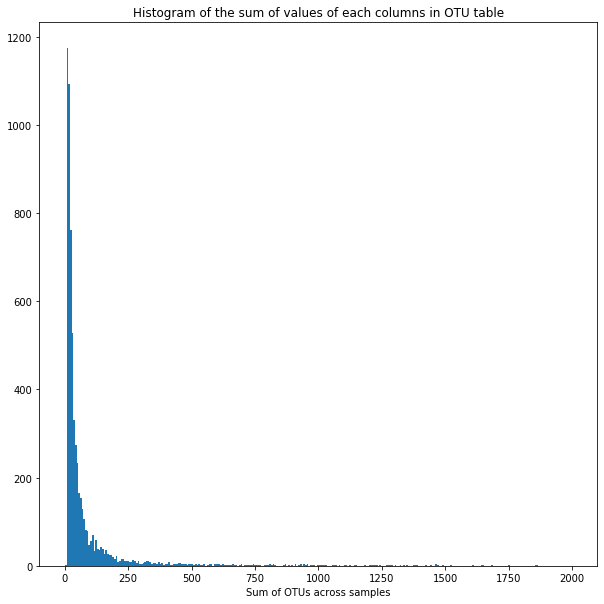

In [786]:
fig11 = plt.figure(figsize=(10,10))
plt.hist(list(df.sum()[1:]), bins=300, range=[0,2000])
plt.xlabel('Sum of OTUs across samples')
plt.title('Histogram of the sum of values of each columns in OTU table')
plt.show()
fig11.savefig('Histogram_OTU.png')

In [769]:
df2=df2.drop(columns=df2.columns[0])

In [833]:
data=df2[df2.columns[1:-2]]

In [672]:
data.max()

OTU000001     18
OTU000002    620
OTU000003      2
OTU000004      7
OTU000006    107
            ... 
OTU059940      0
OTU059941      0
OTU059970      0
OTU059975      0
OTU059979      0
Length: 17544, dtype: int64

In [1031]:
relative_data

array([[0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       ...,
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.0002933]])

In [1028]:
data

,OTU000049,OTU000083,OTU000111,OTU000207,OTU000252,OTU000253,OTU000263,OTU000286,OTU000320,OTU000325,...,OTU003709,OTU000317,OTU001601,OTU000275,OTU000233,OTU000077,OTU001656,OTU000013,OTU008440,OTU000017
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,3.0,8.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,8.0,2.0,15.0,0.0,0.0,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
736,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,23.0,0.0,3.0,0.0,0.0,0.0
737,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,151.0,62.0,0.0,0.0,0.0,0.0,0.0
738,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
739,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0


In [792]:
fdf1=((data-data.min())/(data.max()-data.min()))
# .dropna(axis=1)
# fdf2=((data-data.min())/(data.max()-data.min())).dropna(axis=1)


In [793]:
fdf1

,OTU000049,OTU000083,OTU000111,OTU000207,OTU000252,OTU000253,OTU000263,OTU000286,OTU000320,OTU000325,...,OTU001601,OTU000275,OTU000233,OTU000077,OTU001656,OTU000013,OTU008440,OTU000017,Unnamed: 6259,Unnamed: 6260
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.000,0.0,0.0,0.000000,NaN,NaN
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.002545,0.006993,0.008621,0.000,0.0,0.0,0.000000,NaN,NaN
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.026940,0.000,0.0,0.0,0.000000,NaN,NaN
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.002545,0.002331,0.000000,0.000,0.0,0.0,0.000000,NaN,NaN
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.020356,0.004662,0.016164,0.000,0.0,0.0,0.005005,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
736,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.053613,0.000000,0.003,0.0,0.0,0.000000,NaN,NaN
737,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.384224,0.144522,0.000000,0.000,0.0,0.0,0.000000,NaN,NaN
738,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.000,0.0,0.0,0.000000,NaN,NaN
739,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.002155,0.000,0.0,0.0,0.000000,NaN,NaN


In [680]:
data['OTU043340'].max()

0

In [794]:
fdf1.to_csv('Normalized_OTU_Updated.csv', index=False)

In [797]:
dff=pd.read_csv('Normalized_OTU_Updated.csv')

In [124]:
dff['samples']=df2.samples

In [805]:
dff=dff[dff.columns[:-2]]

In [822]:
dff

,OTU000049,OTU000083,OTU000111,OTU000207,OTU000252,OTU000253,OTU000263,OTU000286,OTU000320,OTU000325,...,OTU003709,OTU000317,OTU001601,OTU000275,OTU000233,OTU000077,OTU001656,OTU000013,OTU008440,OTU000017
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000,0.0,0.0,0.000000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.002545,0.006993,0.008621,0.000,0.0,0.0,0.000000
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.026940,0.000,0.0,0.0,0.000000
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.002545,0.002331,0.000000,0.000,0.0,0.0,0.000000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.020356,0.004662,0.016164,0.000,0.0,0.0,0.005005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
736,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.053613,0.000000,0.003,0.0,0.0,0.000000
737,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.384224,0.144522,0.000000,0.000,0.0,0.0,0.000000
738,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000,0.0,0.0,0.000000
739,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.002155,0.000,0.0,0.0,0.000000


In [160]:
fdf.insert (0, "samples", df2['samples'])

In [162]:
fdf

,samples,OTU000001,OTU000002,OTU000003,OTU000004,OTU000006,OTU000007,OTU000008,OTU000009,OTU000010,...,OTU048280,OTU048290,OTU048295,OTU048299,OTU048322,OTU048333,OTU048335,OTU048346,OTU048350,OTU048354
0,ERR1306253,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,ERR1306176,0.0,0.003226,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,ERR1306087,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,ERR1306170,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,ERR1306014,0.0,0.000000,0.0,0.0,0.009346,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,894.YY965.lane5.NoIndex.L005,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,1.0,0.666667,0.0,0.0,0.0,0.0,0.0
250,963.Iguana.78.051611.LAB.vial.661,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
251,894.SV1770.lane5.NoIndex.L005,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,1.0,0.0,1.0,0.000000,0.0,0.0,1.0,0.0,0.0
252,894.GV998.lane5.NoIndex.L005,0.0,0.080645,0.0,0.0,0.028037,0.0,0.0,0.010526,0.0,...,1.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0


In [217]:
d2=df2[df2.columns[1:]].T
d2=d2.reset_index()
d2[d2.columns[1:]]

,0,1,2,3,4,5,6,7,8,9,...,244,245,246,247,248,249,250,251,252,253
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,2,0,0,0,0,0,0,0,2,...,29,0,0,0,0,0,0,0,50,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,3,0,0,0,0,0,0,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17539,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17540,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17541,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17542,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [1035]:
def Variance_vs_CP(data,plotname):
#     all_data  = pd.read_csv(filename, index_col=False)
#     data = all_data[all_data.columns[1:]]
    print(data.head())
    pca = PCA().fit(data)
    print("'cumulative explained variance'",len(np.cumsum(pca.explained_variance_ratio_)))
    fig = plt.figure(figsize=(13,13))
    plt.plot(np.cumsum(pca.explained_variance_ratio_))
    plt.xlabel('number of components')
    plt.ylabel('cumulative explained variance');
    plt.title(plotname)
    fig.savefig('PCA_of_Normalized_OTU.png')

In [818]:
def Variance_vs_CP2(data,plotname):
#     all_data  = pd.read_csv(filename, index_col=False)
#     data = all_data[all_data.columns[1:]]
    print(data.head())
    pca = SparsePCA().fit(data)
    print("'cumulative explained variance'",len(np.cumsum(pca.explained_variance_ratio_)))
    fig = plt.figure(figsize=(13,13))
    plt.plot(np.cumsum(pca.explained_variance_ratio_))
    plt.xlabel('number of components')
    plt.ylabel('cumulative explained variance');
    plt.title(plotname)
    plt.show()
    fig.savefig('PCA_of_OTU.png')

   OTU000049  OTU000083  OTU000111  OTU000207  OTU000252  OTU000253  \
0        0.0        0.0        0.0        0.0        0.0        0.0   
1        0.0        0.0        0.0        0.0        0.0        0.0   
2        0.0        0.0        0.0        0.0        0.0        0.0   
3        0.0        0.0        0.0        0.0        0.0        0.0   
4        0.0        0.0        0.0        0.0        0.0        0.0   

   OTU000263  OTU000286  OTU000320  OTU000325  ...  OTU003709  OTU000317  \
0        0.0        0.0        0.0        0.0  ...        0.0        0.0   
1        0.0        0.0        0.0        0.0  ...        0.0        0.0   
2        0.0        0.0        0.0        0.0  ...        0.0        0.0   
3        0.0        0.0        0.0        0.0  ...        0.0        0.0   
4        0.0        0.0        0.0        0.0  ...        0.0        0.0   

   OTU001601  OTU000275  OTU000233  OTU000077  OTU001656  OTU000013  \
0        0.0   0.000000   0.000000   0.000000

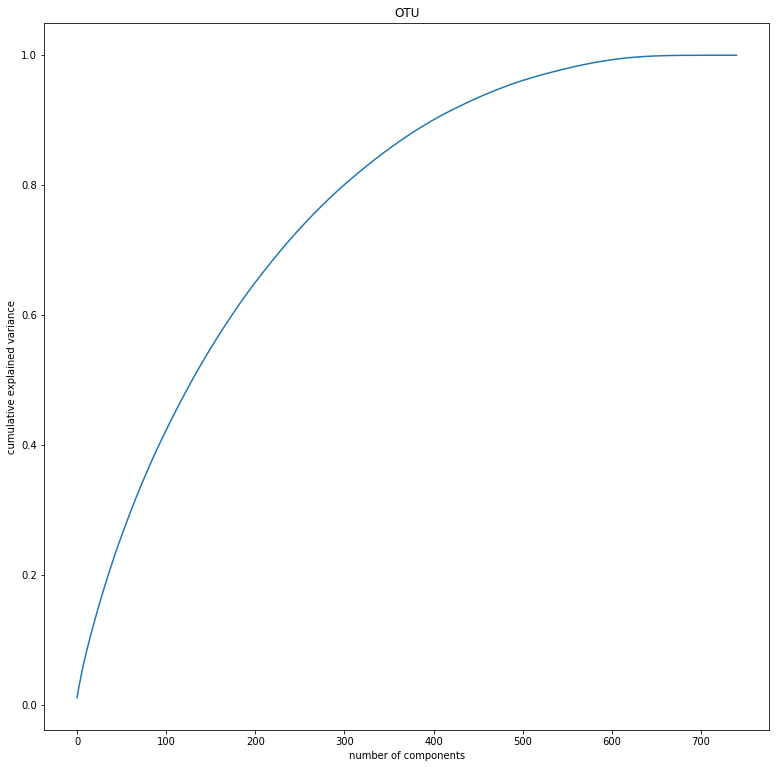

In [1094]:
Variance_vs_CP(relative_data,"OTU")

In [1034]:
def PCA_processing(data):
#     all_data  = pd.read_csv(filename, index_col=False)
#     data = all_data[all_data.columns[1:]]
    data

    pca = PCA()
    principalComponents = pca.fit_transform(data)
    principalDf = pd.DataFrame(data = principalComponents)
#                  , columns = ['principal component 1', 'principal component 2','principal component 3','principal component 4'])
    principalDf

#     CP1= principalDf["principal component 1"].values.tolist()
#     CP2= principalDf["principal component 2"].values.tolist()
#     CP3= principalDf["principal component 3"].values.tolist()
    return principalDf

In [1037]:
pca_data=PCA_processing(relative_data)
pca_data

,0,1,2,3,4,5,6,7,8,9,...,731,732,733,734,735,736,737,738,739,740
0,-0.005488,-0.010184,-0.003641,-0.004435,-0.001840,-0.001075,-0.011282,-0.000116,-0.010918,-0.002746,...,-2.576604e-09,7.972036e-10,-1.622751e-09,1.904810e-10,-8.296849e-10,-2.163907e-10,-1.564776e-12,-2.141003e-13,-2.815999e-15,2.383064e-16
1,-0.005523,-0.010291,-0.003684,-0.004489,-0.001867,-0.001094,-0.011451,-0.000099,-0.011111,-0.002803,...,-9.083891e-11,-1.317447e-09,1.145838e-09,3.214998e-10,4.569726e-12,4.332730e-11,1.569728e-12,1.015213e-13,1.333023e-15,2.383064e-16
2,-0.006889,-0.014575,-0.005414,-0.007055,-0.003116,-0.002223,-0.017487,0.006248,-0.012921,-0.004977,...,-1.955021e-10,9.394084e-12,3.455434e-11,-1.088191e-11,4.116665e-11,-5.850420e-12,2.513697e-14,4.611844e-14,-1.956970e-16,2.383064e-16
3,-0.005922,-0.011358,-0.004096,-0.005067,-0.002130,-0.001317,-0.012697,-0.000298,-0.011128,-0.003116,...,-1.011129e-10,-8.945745e-11,3.852677e-11,1.124423e-11,1.771358e-11,-5.885476e-12,6.094371e-14,3.690840e-15,3.303640e-17,2.383064e-16
4,-0.011117,-0.032350,-0.013194,-0.019855,-0.010186,-0.009383,-0.063479,0.174058,0.061070,-0.014141,...,-1.181260e-11,2.909160e-12,1.421844e-11,-1.029510e-11,-3.913283e-12,-4.456157e-12,-8.305151e-16,7.157814e-16,-1.467199e-18,2.383064e-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
736,-0.005959,-0.011622,-0.004214,-0.005105,-0.002208,-0.001328,-0.013708,0.000113,-0.013490,-0.003569,...,-5.585087e-10,-4.805133e-10,-3.462688e-11,3.141617e-10,-2.576153e-10,5.160005e-11,3.941938e-14,1.021721e-14,-1.427283e-17,2.383064e-16
737,-0.006212,-0.012318,-0.004483,-0.005558,-0.002383,-0.001440,-0.015326,0.005327,-0.011412,-0.003642,...,-9.836366e-10,-7.268878e-10,-5.105431e-10,1.622136e-09,-1.957015e-11,-3.404730e-10,4.094337e-13,-1.241213e-14,-4.023858e-16,2.383064e-16
738,-0.007232,-0.015574,-0.005799,-0.007534,-0.003309,-0.002230,-0.019624,-0.001533,-0.018373,-0.005815,...,-3.568210e-11,-5.707907e-12,1.633386e-11,8.749757e-12,-2.268223e-11,-1.772886e-12,6.557086e-14,-3.790580e-15,-2.973756e-17,2.383064e-16
739,-0.007597,-0.017024,-0.006416,-0.008513,-0.003809,-0.002735,-0.021313,-0.001793,-0.022018,-0.007040,...,-1.345655e-10,-1.910707e-11,-4.042054e-11,1.767519e-11,-3.823930e-11,-1.847836e-12,1.055480e-14,-1.156701e-15,-6.118275e-17,2.383064e-16


In [658]:
np.sqrt(pca_data)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.


,0,1,2,3,4,5,6,7,8,9,...,244,245,246,247,248,249,250,251,252,253
0,NaN,NaN,0.420982,NaN,NaN,0.148296,NaN,NaN,NaN,NaN,...,0.160124,0.052460,0.086651,NaN,0.400589,NaN,0.919701,0.074361,0.043684,5.351505e-08
1,NaN,NaN,0.430229,NaN,NaN,0.151032,NaN,NaN,NaN,NaN,...,NaN,NaN,0.032318,0.076720,NaN,0.035273,NaN,NaN,NaN,5.351505e-08
2,NaN,NaN,0.459823,NaN,NaN,0.143101,NaN,NaN,NaN,NaN,...,NaN,NaN,0.018006,0.012790,NaN,0.005350,NaN,0.004012,NaN,5.351505e-08
3,NaN,NaN,0.426132,NaN,NaN,0.150220,NaN,NaN,NaN,NaN,...,NaN,NaN,0.005390,0.041960,NaN,0.018640,NaN,NaN,0.017603,5.351505e-08
4,NaN,NaN,0.491374,NaN,NaN,0.140561,0.027591,NaN,NaN,NaN,...,NaN,0.021895,NaN,0.015881,0.009267,NaN,0.031271,0.013891,0.004594,5.351505e-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,NaN,NaN,0.942524,NaN,2.854572,NaN,0.315401,0.144570,0.106974,0.074656,...,NaN,NaN,0.010320,0.006233,NaN,0.001892,NaN,0.002530,NaN,5.351505e-08
250,NaN,NaN,0.571876,NaN,NaN,0.153210,NaN,NaN,NaN,NaN,...,NaN,NaN,0.007989,0.007990,NaN,0.002890,NaN,0.004080,NaN,5.351505e-08
251,NaN,NaN,0.903538,NaN,3.156155,NaN,0.349762,NaN,0.575886,0.465588,...,NaN,NaN,0.005069,0.005250,NaN,0.002165,NaN,0.003396,0.006898,5.351505e-08
252,0.670715,1.027360,0.490625,NaN,NaN,0.564811,NaN,NaN,NaN,0.101492,...,0.021969,NaN,0.029186,0.006446,NaN,0.003016,NaN,0.004483,NaN,5.351505e-08


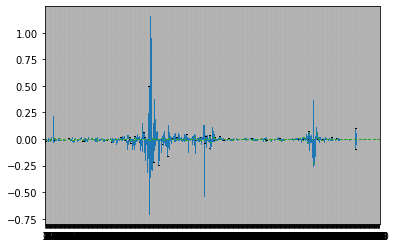

In [1095]:
bic_list = []
labels = []
for n in range(1,10):
        
        pcs= relative_data[relative_data.columns[:600]]
        models = GMM(n_components = n).fit(pcs)
        print(models.means_)
        bic_list.append(models.bic(pcs))
        labels.append(models.predict(pcs))

[[0.00134953 0.00134953 0.00134953 0.00134953 0.00134953 0.00134953
  0.00134953 0.00134953 0.00134953 0.00134953 0.00134953 0.00134953
  0.00134953 0.00134953 0.00134953 0.00134953 0.00134953 0.00134953
  0.00134953 0.00134953 0.00134953 0.00134953 0.00134953 0.00134953
  0.00134953 0.00134953 0.00134953 0.00134953 0.00134953 0.00134953
  0.00134953 0.00134953 0.00134953 0.00134953 0.00134953 0.00134953
  0.00134953 0.00134953 0.00134953 0.00134953 0.00134953 0.00134953
  0.00134953 0.00134953 0.00134953 0.00134953 0.00134953 0.00134953
  0.00134953 0.00134953 0.00134953 0.00134953 0.00134953 0.00134953
  0.00134953 0.00134953 0.00134953 0.00134953 0.00134953 0.00134953
  0.00134953 0.00134953 0.00134953 0.00134953 0.00134953 0.00134953
  0.00134953 0.00134953 0.00134953 0.00134953 0.00134953 0.00134953
  0.00134953 0.00134953 0.00134953 0.00134953 0.00134953 0.00134953
  0.00134953 0.00134953 0.00134953 0.00134953 0.00134953 0.00134953
  0.00134953 0.00134953 0.00134953 0.00134953 0.

[[0.0013624  0.00122616 0.0013624  ... 0.0013624  0.0013624  0.0013624 ]
 [0.         0.05       0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]
[[0.0013624  0.0013624  0.0013624  ... 0.00012385 0.0013624  0.0013624 ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.00136426 0.00136426 ... 

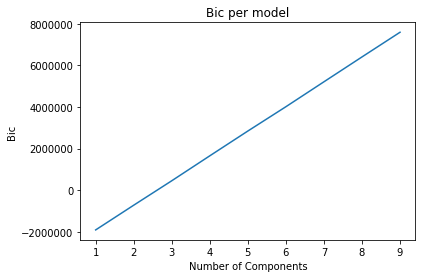

In [1096]:
fig2 = plt.figure(1)
plt.plot(range(1,10),bic_list)
plt.xlabel("Number of Components")
plt.ylabel("Bic")
plt.title("Bic per model")
plt.show()
fig2.savefig('bic.png')

In [ ]:
labels[4]
df2['class']=labels[4]
df2.to_csv('Clusterd_OTU.csv', index=False)

In [982]:
df2.drop(df2.columns[1:len(df2.columns)-1], axis=1).to_csv('Clusterd_OTU.csv', index=False)

In [983]:
pcs= pca_data[pca_data.columns[:100]]

In [928]:
models = GMM(n_components =6 ).fit(pcs)
labels=models.predict(pcs)

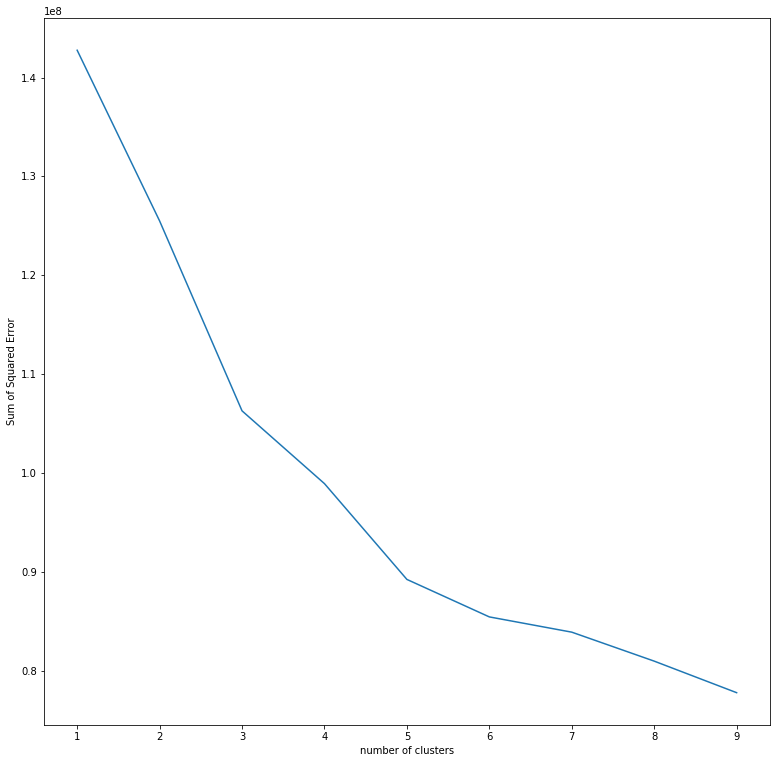

In [1001]:
sse_set = []
for ii in range(1,10):
    cls = KMeans(n_clusters=ii).fit(pcs)
    sse_set.append(cls.inertia_)
fig9 = plt.figure(figsize=(13,13))
plt.plot(range(1,10),sse_set)
plt.xlabel('number of clusters')
plt.ylabel('Sum of Squared Error');
plt.show()
fig9.savefig('kmeans')    

In [662]:
cls = KMeans(n_clusters=6).fit(pca_data[pca_data.columns[0:5]])


In [474]:
cls=DBSCAN().fit(pca_data)
labels=cls.labels_    

In [929]:
color_num = {0: "#7b3294", 1: "#008837", 2: "#c2a5cf", 3: "#a6dba0", 4:"yellow",5:'green',6:'orange',7:'brown',8:'grey'}

In [961]:
color_set = [color_num[num] for num in labels[4]]

<Figure size 432x288 with 0 Axes>

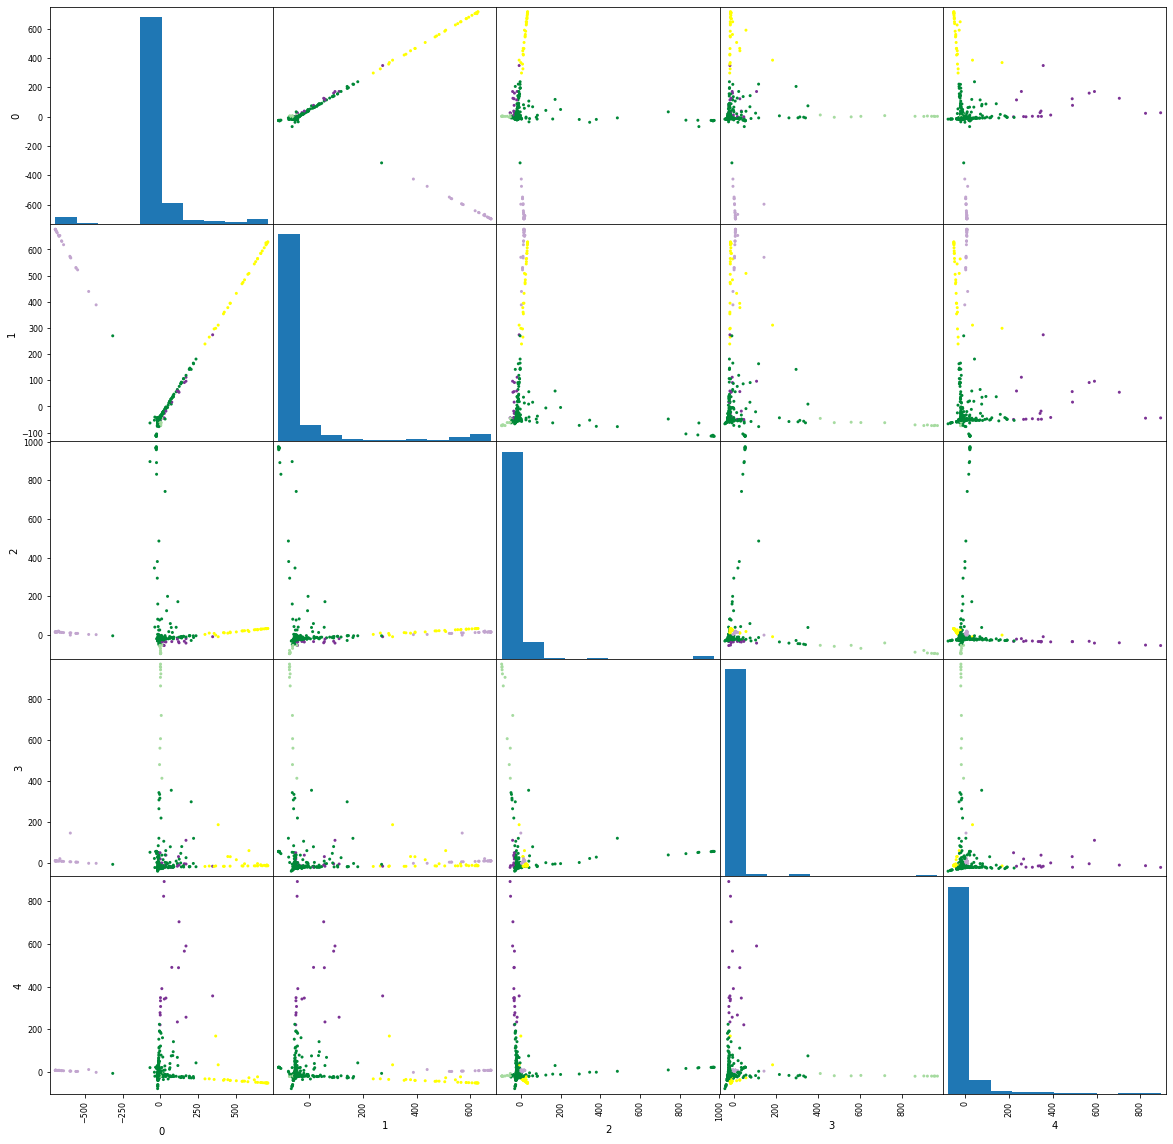

In [963]:
fig99 = plt.figure()
savefi=scatter_matrix(pca_data[pca_data.columns[:5]], alpha=1, figsize=(20,20) ,c=color_set)
# labels=["Label A", "Label B", "Label C"]
# plt.legend(savefi, [str(i) for i in range(5)], loc=(1.02,0))
plt.show()
fig99.savefig('scatter_matrix_pca')

In [486]:
cls.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [1101]:
meta_data = pd.read_csv('PAMclusters_new.csv')

In [1102]:
meta_data

,id,species,order,digestive_habitat_type,diet,surrounding_habitat,category
0,MVB2015-2006,scinax fuscovarius,anura,intestine,carnivore,freshwater,1
1,MVB2015-2008,scinax fuscovarius,anura,intestine,carnivore,freshwater,1
2,MVB2015-2010,scinax fuscovarius,anura,intestine,carnivore,freshwater,1
3,MVB2015-2012,scinax fuscovarius,anura,intestine,carnivore,freshwater,1
4,MVB2015-2024,dendropsophus minutus,anura,intestine,carnivore,freshwater,1
...,...,...,...,...,...,...,...
736,ERR1720546,durbania amakosa,lepidoptera,intestine,herbivore,terrestrial,5
737,ERR1720547,durbania amakosa,lepidoptera,stomach,herbivore,terrestrial,5
738,ERR1720548,durbania amakosa,lepidoptera,stomach,herbivore,terrestrial,5
739,ERR1720549,durbania amakosa,lepidoptera,stomach,herbivore,terrestrial,5


In [1324]:
bio_mass = pd.read_csv('EMPmetadata_animal.csv')


In [1327]:
bio_mass=bio_mass.fillna(0)

In [1328]:
bio_mass

,SampleID,cluster,bodymass,host_scientific_name,Unnamed: 4,digestive_habitat_type,diet,surrounding_habitat,host_order,host_kingdom,...,Bio9_2_5min,Bio14_2_5min,Bio15_2_5min,Bio18_2_5min,Bio19_2_5min,terrain_complexity,NDVI_Modis_1_mar.2018,Immune_Complexity_Ordinal,maxlongevity,elevation_m
0,ERR1720447,3,0,maculinea alcon,0.0,intestine,herbivore,terrestrial,lepidoptera,animalia,...,2.782490,29.00,26.866139,158.75775,105.199902,4.250000,127,0,0.0,8
1,ERR1720439,3,0,maculinea alcon,0.0,intestine,carnivore,terrestrial,lepidoptera,animalia,...,2.782490,29.00,26.866139,158.75775,105.199902,4.250000,127,0,0.0,8
2,ERR1720435,3,0,maculinea alcon,0.0,intestine,carnivore,terrestrial,lepidoptera,animalia,...,2.782490,29.00,26.866139,158.75775,105.199902,4.250000,127,0,0.0,8
3,ERR1720446,3,0,maculinea alcon,0.0,intestine,herbivore,terrestrial,lepidoptera,animalia,...,2.782490,29.00,26.866139,158.75775,105.199902,4.250000,127,0,0.0,8
4,ERR1720452,3,0,maculinea alcon,0.0,intestine,herbivore,terrestrial,lepidoptera,animalia,...,2.782490,29.00,26.866139,158.75775,105.199902,4.250000,127,0,0.0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
721,SRR2532253,1,medium,ovis aries,0.0,stomach,herbivore,terrestrial,artiodactyla,animalia,...,-5.621733,1.72,87.618315,211.60000,8.160000,5998.169922,62,9,22.8,1931
722,SRR2532256,1,medium,ovis aries,0.0,stomach,herbivore,terrestrial,artiodactyla,animalia,...,-5.621733,1.72,87.618315,211.60000,8.160000,5998.169922,62,9,22.8,1931
723,SRR2532226,1,medium,ovis aries,0.0,stomach,herbivore,terrestrial,artiodactyla,animalia,...,-5.621733,1.72,87.618315,211.60000,8.160000,5998.169922,62,9,22.8,1931
724,SRR850069,1,small,neotoma albigula,0.0,stomach,herbivore,terrestrial,rodentia,animalia,...,7.229067,24.60,22.009955,156.40000,111.800000,135719.000000,55,9,9.5,2510


In [1321]:
bio_mass[bio_mass.columns[1:]]

,cluster,bodymass,host_scientific_name,Unnamed: 4,digestive_habitat_type,diet,surrounding_habitat,host_order,host_kingdom,host_phylum,...,Bio9_2_5min,Bio14_2_5min,Bio15_2_5min,Bio18_2_5min,Bio19_2_5min,terrain_complexity,NDVI_Modis_1_mar.2018,Immune_Complexity_Ordinal,maxlongevity,elevation_m
0,3,NaN,maculinea alcon,NaN,intestine,herbivore,terrestrial,lepidoptera,animalia,arthropoda,...,2.782490,29.00,26.866139,158.75775,105.199902,4.250000,127,0,NaN,8
1,3,NaN,maculinea alcon,NaN,intestine,carnivore,terrestrial,lepidoptera,animalia,arthropoda,...,2.782490,29.00,26.866139,158.75775,105.199902,4.250000,127,0,NaN,8
2,3,NaN,maculinea alcon,NaN,intestine,carnivore,terrestrial,lepidoptera,animalia,arthropoda,...,2.782490,29.00,26.866139,158.75775,105.199902,4.250000,127,0,NaN,8
3,3,NaN,maculinea alcon,NaN,intestine,herbivore,terrestrial,lepidoptera,animalia,arthropoda,...,2.782490,29.00,26.866139,158.75775,105.199902,4.250000,127,0,NaN,8
4,3,NaN,maculinea alcon,NaN,intestine,herbivore,terrestrial,lepidoptera,animalia,arthropoda,...,2.782490,29.00,26.866139,158.75775,105.199902,4.250000,127,0,NaN,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
721,1,medium,ovis aries,NaN,stomach,herbivore,terrestrial,artiodactyla,animalia,chordata,...,-5.621733,1.72,87.618315,211.60000,8.160000,5998.169922,62,9,22.8,1931
722,1,medium,ovis aries,NaN,stomach,herbivore,terrestrial,artiodactyla,animalia,chordata,...,-5.621733,1.72,87.618315,211.60000,8.160000,5998.169922,62,9,22.8,1931
723,1,medium,ovis aries,NaN,stomach,herbivore,terrestrial,artiodactyla,animalia,chordata,...,-5.621733,1.72,87.618315,211.60000,8.160000,5998.169922,62,9,22.8,1931
724,1,small,neotoma albigula,NaN,stomach,herbivore,terrestrial,rodentia,animalia,chordata,...,7.229067,24.60,22.009955,156.40000,111.800000,135719.000000,55,9,9.5,2510


In [1135]:
quantitative=bio_mass[['PD_whole_tree','Bio12_2_5min','Bio13_2_5min','Bio14_2_5min','Bio15_2_5min','Bio16_2_5min','Bio17_2_5min','Bio18_2_5min','Bio19_2_5min','Vegetation_density','terrain_complexity','NDVI_Modis_1_mar.2018','Immune_Complexity_Ordinal']]

In [1136]:
quantitative= quantitative.fillna(quantitative.mean())

In [1137]:
quantitative

,PD_whole_tree,Bio12_2_5min,Bio13_2_5min,Bio14_2_5min,Bio15_2_5min,Bio16_2_5min,Bio17_2_5min,Bio18_2_5min,Bio19_2_5min,Vegetation_density,terrain_complexity,NDVI_Modis_1_mar.2018,Immune_Complexity_Ordinal
0,13.32986,398.000000,129.600000,1.000000,132.262657,296.800000,6.000000,294.000000,6.000000,0.0,27502.500000,73,9
1,13.18811,398.000000,129.600000,1.000000,132.262657,296.800000,6.000000,294.000000,6.000000,0.0,27502.500000,73,9
2,13.99880,375.920000,128.120000,0.640000,141.989489,294.000000,2.640000,294.000000,2.640000,0.0,14950.799800,60,9
3,13.33633,375.920000,128.120000,0.640000,141.989489,294.000000,2.640000,294.000000,2.640000,0.0,14950.799800,60,9
4,13.40210,390.480000,111.200000,1.000000,125.556120,281.880000,3.000000,281.880000,3.000000,0.0,85892.398440,57,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,12.19983,536.065924,95.372480,10.915561,66.269265,255.744960,42.915561,255.744960,42.915561,0.0,6.888890,33,9
263,19.87397,560.564096,93.324032,10.836032,64.060271,261.684032,44.172032,261.684032,44.172032,0.0,3.506170,28,9
264,13.43467,560.538212,93.329404,10.838284,64.063105,261.676444,44.167564,261.676444,44.167564,0.0,3.506170,28,9
265,19.58361,516.541319,92.329141,11.000000,64.240772,239.469520,43.000000,239.469520,43.000000,0.0,18.246901,28,9


In [1138]:
fs=SelectKBest(chi2, k=4).fit_transform(quantitative, bio_mass['cluster'])

In [1140]:
fs

array([[3.98000000e+02, 6.00000000e+00, 2.94000000e+02, 2.75025000e+04],
       [3.98000000e+02, 6.00000000e+00, 2.94000000e+02, 2.75025000e+04],
       [3.75920000e+02, 2.64000000e+00, 2.94000000e+02, 1.49507998e+04],
       ...,
       [5.60538212e+02, 4.41675640e+01, 2.61676444e+02, 3.50617000e+00],
       [5.16541319e+02, 4.30000000e+01, 2.39469520e+02, 1.82469006e+01],
       [5.16541319e+02, 4.30000000e+01, 2.39469520e+02, 1.82469006e+01]])

In [1164]:
 kb = fs.SelectKBest(k='all')

 kb.fit(quantitative, bio_mass['cluster'])

 names = quantitative.columns.values[kb.get_support()]

 scores = kb.scores_[kb.get_support()]
 pvalue = kb.pvalues_[kb.get_support()]

 names_scores = list(zip(names, scores,pvalue))

 ns_df = pd.DataFrame(data = names_scores, columns=

  ['Feat_names','F_Scores','PValue'])

 ns_df_sorted = ns_df.sort_values(['F_Scores','Feat_names'], ascending =

  [False, True])

 print(ns_df_sorted)

                   Feat_names   F_Scores    PValue
0               PD_whole_tree  10.658016  0.000001
11      NDVI_Modis_1_mar.2018   9.467104  0.000006
7                Bio18_2_5min   7.970164  0.000042
4                Bio15_2_5min   5.181366  0.001708
10         terrain_complexity   4.207909  0.006265
3                Bio14_2_5min   3.938654  0.008969
6                Bio17_2_5min   3.390255  0.018584
9          Vegetation_density   3.259138  0.022106
1                Bio12_2_5min   2.175193  0.091328
2                Bio13_2_5min   1.968573  0.119065
8                Bio19_2_5min   1.359422  0.255624
5                Bio16_2_5min   1.066588  0.363757
12  Immune_Complexity_Ordinal   0.499993  0.682604


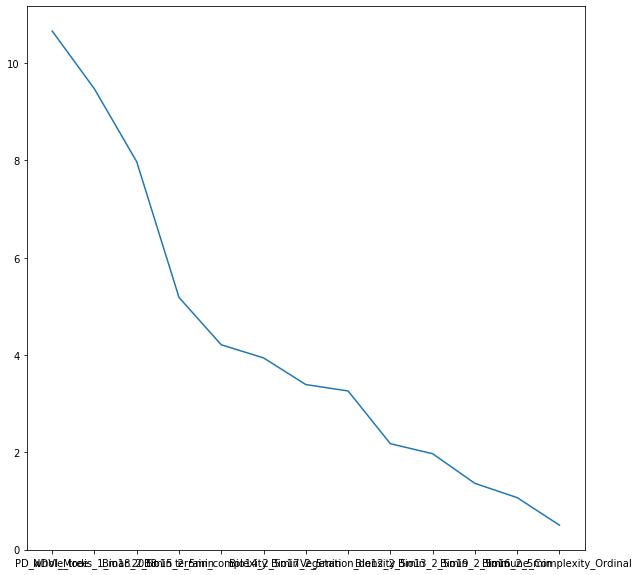

In [1149]:
fig11 = plt.figure(figsize=(10,10))
plt.plot(ns_df_sorted[ns_df_sorted.columns[0]],ns_df_sorted[ns_df_sorted.columns[1]])
plt.show()

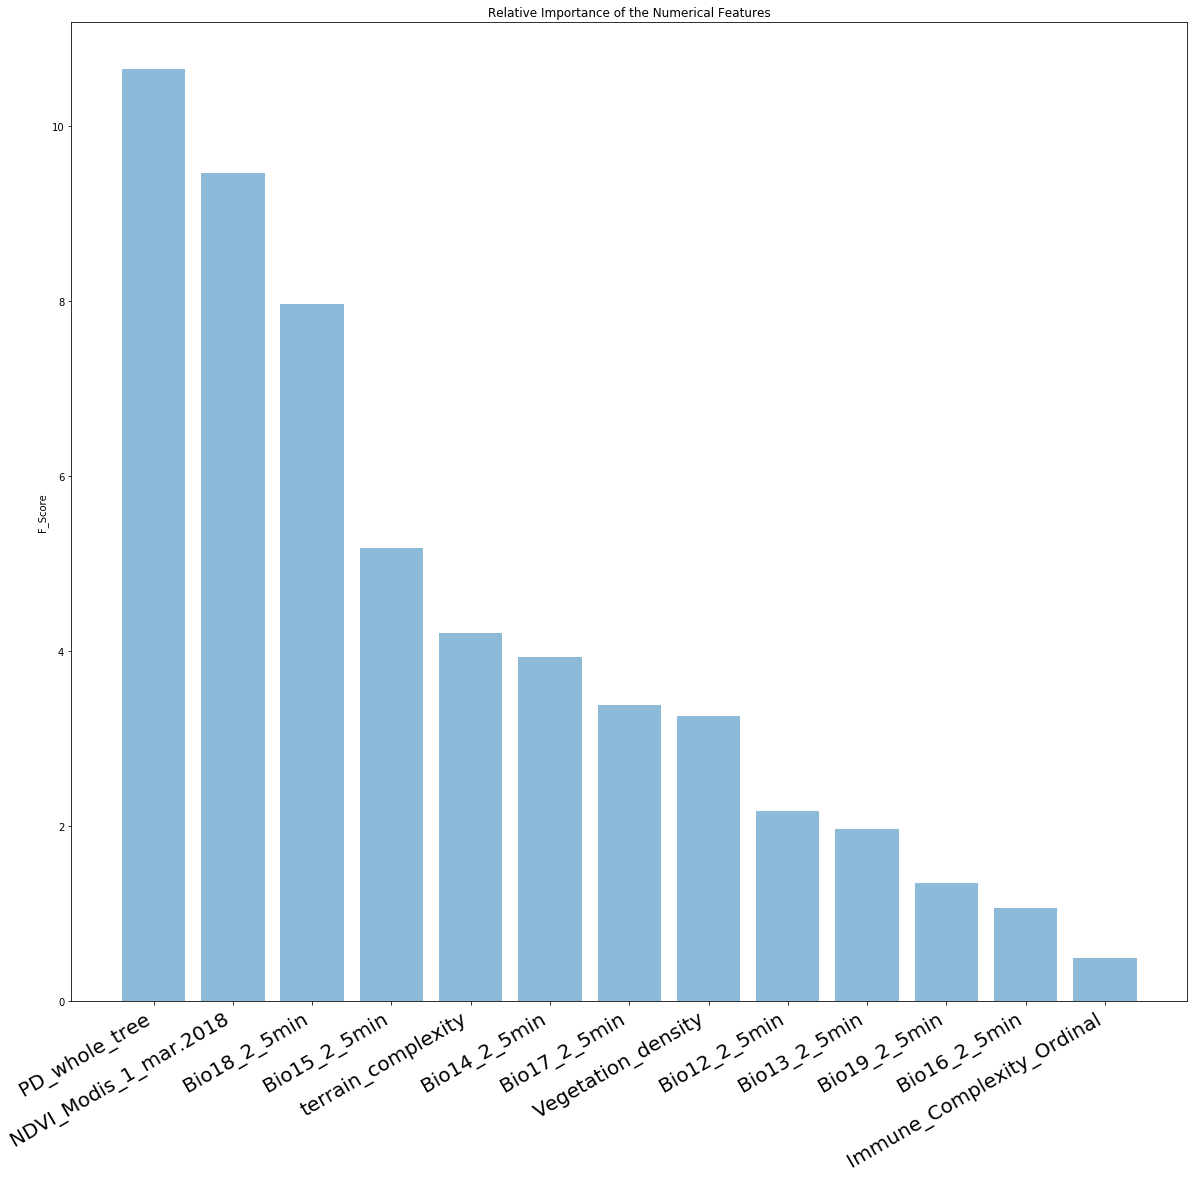

In [1162]:
fig11 = plt.figure(figsize=(20,20))
objects = ns_df_sorted[ns_df_sorted.columns[0]]
y_pos = np.arange(len(objects))
performance = ns_df_sorted[ns_df_sorted.columns[1]]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.tick_params(axis="x", labelsize=20)
plt.ylabel('F_Score')
plt.title('Relative Importance of the Numerical Features')
fig11.autofmt_xdate()
plt.show()

fig11.savefig('Feature_Importance.png')

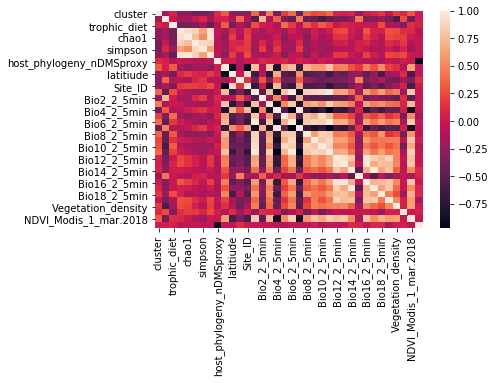

In [1200]:
sns.heatmap(bio_mass.corr())

In [1226]:
corr=[]
for a,b in bio_mass.groupby('cluster'):
    print(a)
    corr.append(b.corr())
#     sns.heatmap(corr)

1
2
3
4


In [1227]:
corr2=[]
for a,b in bio_mass_replace.groupby('cluster'):
    print(a)
    corr2.append(b.corr())
#     sns.heatmap(corr)

1
2
3
4


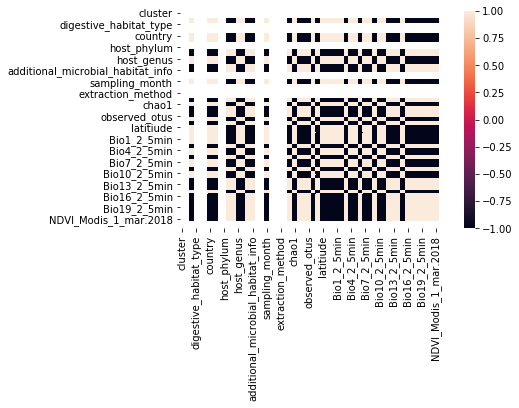

In [1235]:
fig00 = plt.figure()
sns.heatmap(corr2[3])
fig00.savefig('cluster_4_corr_all.png')

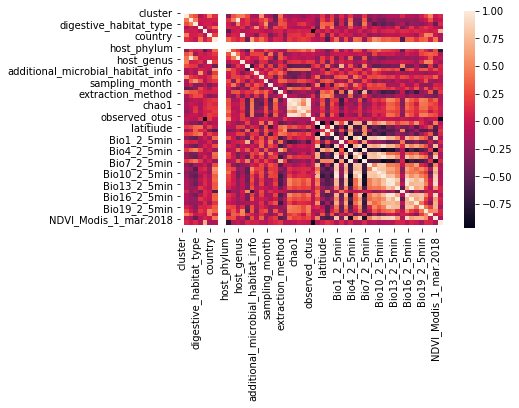

In [1219]:
sns.heatmap(corr[0])

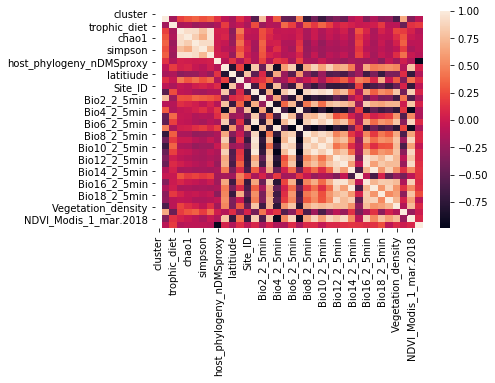

In [1215]:
sns.heatmap(corr[1])

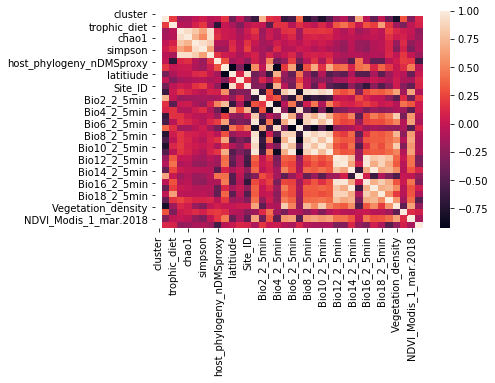

In [1216]:
sns.heatmap(corr[2])

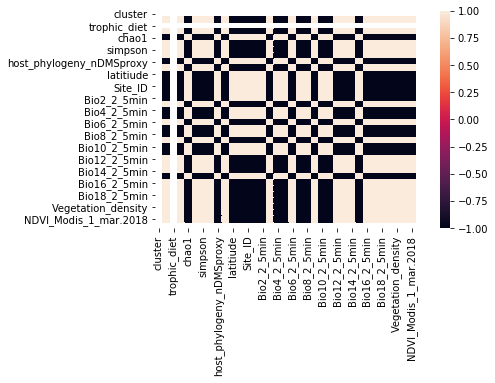

In [1217]:
sns.heatmap(corr[3])

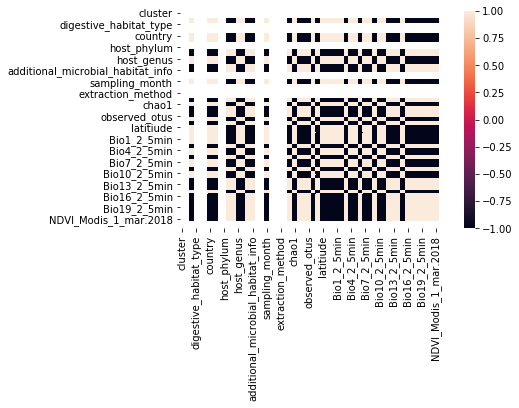

In [1220]:
sns.heatmap(corr[3])

In [1209]:
sns.heatmap(corr[4])

IndexError: list index out of range

In [1330]:
replace_map_comp = {}
for iii in ['bodymass', 'host_scientific_name', 'Unnamed: 4',
       'digestive_habitat_type', 'diet', 'surrounding_habitat', 'host_order',
       'host_kingdom', 'host_phylum', 'host_class', 'host_family',
       'host_genus', 'country', 'lifestage', 'captive_wild',
       'preservation_method', 'extraction_method']:
    labels = bio_mass[iii].astype('category').cat.categories.tolist()
    replace_map_comp[iii] = {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}

print(replace_map_comp)


{'bodymass': {0: 1, 'large': 2, 'medium': 3, 'small': 4}, 'host_scientific_name': {'acinonyx jubatus': 1, 'acronicta lepusculina': 2, 'adeloneivaia jason': 3, 'aloeides pallida': 4, 'alouatta palliata': 5, 'alouatta pigra': 6, 'anser indicus': 7, 'anser sp': 8, 'anthene sp': 9, 'anthene usamba': 10, 'antirrhea lindigii': 11, 'antrozous dubiaquercus': 12, 'apis mellifera': 13, 'archaeoprepona camilla': 14, 'archaeoprepona demophoon': 15, 'artibeus glaucus': 16, 'artibeus jamaicensis': 17, 'artibeus lituratus': 18, 'artibeus phaeotis': 19, 'astraptes samson': 20, 'automeris postalbida': 21, 'axiocerses thyra': 22, 'azteca sp': 23, 'boophis sp': 24, 'bos taurus': 25, 'bungalotis quadratum': 26, 'caligo atreus': 27, 'callosamia angulifera': 28, 'camponotus sp': 29, 'canus lupus dingo': 30, 'canus lupus familiaris': 31, 'carollia brevicauda': 32, 'carollia sowelli': 33, 'catocala cara': 34, 'catonephele numilia': 35, 'catostomus sp': 36, 'cecrita probadhj04': 37, 'ceratomia undulosa': 38, '

In [1331]:
bio_mass_replace = bio_mass.copy()

In [1332]:
bio_mass_replace.replace(replace_map_comp, inplace=True)

print(bio_mass_replace.head())

     SampleID  cluster  bodymass  host_scientific_name  Unnamed: 4  \
0  ERR1720447        3         1                   106         1.0   
1  ERR1720439        3         1                   106         1.0   
2  ERR1720435        3         1                   106         1.0   
3  ERR1720446        3         1                   106         1.0   
4  ERR1720452        3         1                   106         1.0   

   digestive_habitat_type  diet  surrounding_habitat  host_order  \
0                       3     3                    2          16   
1                       3     1                    2          16   
2                       3     1                    2          16   
3                       3     3                    2          16   
4                       3     3                    2          16   

   host_kingdom  ...  Bio9_2_5min  Bio14_2_5min  Bio15_2_5min  Bio18_2_5min  \
0             1  ...      2.78249          29.0     26.866139     158.75775   
1           

In [1329]:
bio_mass.columns[2:]

Index(['bodymass', 'host_scientific_name', 'Unnamed: 4',
       'digestive_habitat_type', 'diet', 'surrounding_habitat', 'host_order',
       'host_kingdom', 'host_phylum', 'host_class', 'host_family',
       'host_genus', 'country', 'lifestage', 'captive_wild',
       'preservation_method', 'extraction_method', 'PD_whole_tree', 'chao1',
       'shannon', 'simpson', 'observed_otus', 'host_phylogeny_nDMSproxy',
       'latitiude', 'longitude', 'Bio2_2_5min', 'Bio3_2_5min', 'Bio5_2_5min',
       'Bio9_2_5min', 'Bio14_2_5min', 'Bio15_2_5min', 'Bio18_2_5min',
       'Bio19_2_5min', 'terrain_complexity', 'NDVI_Modis_1_mar.2018',
       'Immune_Complexity_Ordinal', 'maxlongevity', 'elevation_m'],
      dtype='object')

In [1333]:
kb = fs.SelectKBest(k='all')

kb.fit(bio_mass_replace[bio_mass_replace.columns[2:]], bio_mass_replace['cluster'])

names = bio_mass_replace[bio_mass_replace.columns[2:]].columns.values[kb.get_support()]

scores = kb.scores_[kb.get_support()]
pvalue = kb.pvalues_[kb.get_support()]

names_scores = list(zip(names, scores,pvalue))

ns_df = pd.DataFrame(data = names_scores, columns=

['Feat_names','F_Scores','PValue'])

ns_df_sorted = ns_df.sort_values(['F_Scores','Feat_names'], ascending =

[False, True])

print(ns_df_sorted)

                   Feat_names    F_Scores        PValue
20                    simpson  135.932258  7.706016e-51
19                    shannon   85.604989  4.296464e-34
3      digestive_habitat_type   43.290894  1.746790e-18
17              PD_whole_tree   33.941786  8.143406e-15
8                 host_phylum   28.956506  7.991592e-13
22   host_phylogeny_nDMSproxy   28.951158  8.031254e-13
35  Immune_Complexity_Ordinal   27.312032  3.674946e-12
21              observed_otus   26.293406  9.486354e-12
13                  lifestage   20.401223  2.403515e-09
18                      chao1   20.255460  2.759183e-09
15        preservation_method   17.913095  2.552989e-08
27                Bio5_2_5min   17.377728  4.253389e-08
10                host_family   14.501578  6.684764e-07
24                  longitude   11.638359  1.059700e-05
0                    bodymass   10.503132  3.188280e-05
25                Bio2_2_5min   10.458164  3.330700e-05
5         surrounding_habitat    5.550942  4.051

/usr/local/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [2 7] are constant.
  UserWarning)
/usr/local/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [1335]:
bio_mass_replace[bio_mass_replace.columns[2:]].head()

,bodymass,host_scientific_name,Unnamed: 4,digestive_habitat_type,diet,surrounding_habitat,host_order,host_kingdom,host_phylum,host_class,...,Bio9_2_5min,Bio14_2_5min,Bio15_2_5min,Bio18_2_5min,Bio19_2_5min,terrain_complexity,NDVI_Modis_1_mar.2018,Immune_Complexity_Ordinal,maxlongevity,elevation_m
0,1,106,1.0,3,3,2,16,1,1,3,...,2.78249,29.0,26.866139,158.75775,105.199902,4.25,127,0,0.0,8
1,1,106,1.0,3,1,2,16,1,1,3,...,2.78249,29.0,26.866139,158.75775,105.199902,4.25,127,0,0.0,8
2,1,106,1.0,3,1,2,16,1,1,3,...,2.78249,29.0,26.866139,158.75775,105.199902,4.25,127,0,0.0,8
3,1,106,1.0,3,3,2,16,1,1,3,...,2.78249,29.0,26.866139,158.75775,105.199902,4.25,127,0,0.0,8
4,1,106,1.0,3,3,2,16,1,1,3,...,2.78249,29.0,26.866139,158.75775,105.199902,4.25,127,0,0.0,8


In [1236]:
bio_mass_replace.to_csv('Bioweight_metadata_Quantitative.csv', index=False)

In [1336]:
data=bio_mass_replace[bio_mass_replace.columns[2:]]

In [1337]:
 kb = fs.SelectKBest(k='all')

 kb.fit(data, bio_mass_replace['cluster'])

 names = data.columns.values[kb.get_support()]

 scores = kb.scores_[kb.get_support()]
 pvalue = kb.pvalues_[kb.get_support()]

 names_scores = list(zip(names, scores,pvalue))

 ns_df = pd.DataFrame(data = names_scores, columns=

  ['Feat_names','F_Scores','PValue'])

 ns_df_sorted = ns_df.sort_values(['F_Scores','Feat_names'], ascending =

  [False, True])

 print(ns_df_sorted)

                   Feat_names    F_Scores        PValue
20                    simpson  135.932258  7.706016e-51
19                    shannon   85.604989  4.296464e-34
3      digestive_habitat_type   43.290894  1.746790e-18
17              PD_whole_tree   33.941786  8.143406e-15
8                 host_phylum   28.956506  7.991592e-13
22   host_phylogeny_nDMSproxy   28.951158  8.031254e-13
35  Immune_Complexity_Ordinal   27.312032  3.674946e-12
21              observed_otus   26.293406  9.486354e-12
13                  lifestage   20.401223  2.403515e-09
18                      chao1   20.255460  2.759183e-09
15        preservation_method   17.913095  2.552989e-08
27                Bio5_2_5min   17.377728  4.253389e-08
10                host_family   14.501578  6.684764e-07
24                  longitude   11.638359  1.059700e-05
0                    bodymass   10.503132  3.188280e-05
25                Bio2_2_5min   10.458164  3.330700e-05
5         surrounding_habitat    5.550942  4.051

/usr/local/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [2 7] are constant.
  UserWarning)
/usr/local/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [1355]:
ns_df_sorted.to_csv('Fscore_Pvalue_table.csv', index=False)

In [1292]:
data=data.fillna(0)

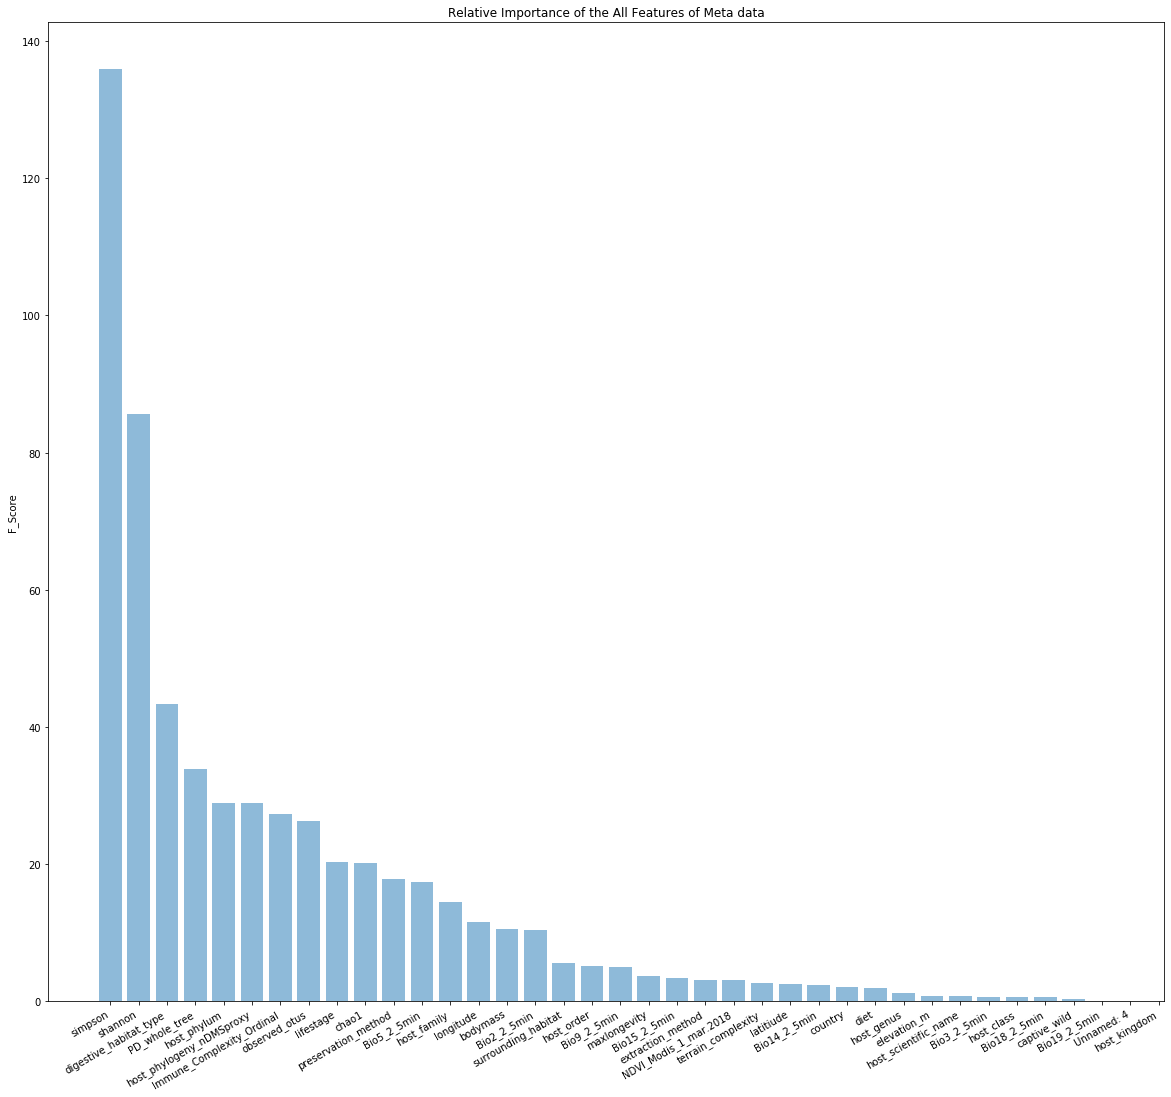

In [1339]:
fig11 = plt.figure(figsize=(20,20))
objects = ns_df_sorted[ns_df_sorted.columns[0]]
y_pos = np.arange(len(objects))
performance = ns_df_sorted[ns_df_sorted.columns[1]]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.tick_params(axis="x", labelsize=10)
plt.ylabel('F_Score')
plt.title('Relative Importance of the All Features of Meta data')
fig11.autofmt_xdate()
plt.show()

fig11.savefig('Feature_Importance_All.png')

In [1340]:
corr = pd.DataFrame()
for a,bb in bio_mass_replace.groupby('cluster'):
    for b in list(bb.columns[1:].values):
        corr.loc[a, b] = bb[bb.columns[1:]].corr().loc['PD_whole_tree', b]

In [1345]:
corr.T

,1,2,3
cluster,NaN,NaN,NaN
bodymass,0.017599,-0.262362,NaN
host_scientific_name,0.026550,0.211007,-1.586407e-01
Unnamed: 4,NaN,NaN,NaN
digestive_habitat_type,-0.140859,0.019015,3.829009e-01
diet,0.030293,0.067079,6.193880e-02
surrounding_habitat,-0.171582,NaN,NaN
host_order,-0.220136,0.180539,NaN
host_kingdom,NaN,NaN,NaN
host_phylum,0.465022,0.045767,NaN


In [1346]:
ns_df_sorted2=corr.T.sort_values(by=list(range(1,4)), ascending =

  [False, False,False] )
ns_df_sorted2=ns_df_sorted2.reset_index()

In [1349]:
ns_df_sorted2

,index,1,2,3
1,observed_otus,0.963849,0.986216,9.698022e-01
2,chao1,0.933997,0.962594,7.467653e-01
3,shannon,0.839945,0.862977,5.102003e-01
4,simpson,0.581595,0.619525,2.872680e-01
5,host_phylum,0.465022,0.045767,NaN
6,Immune_Complexity_Ordinal,0.456819,0.045767,NaN
7,longitude,0.175809,0.189683,-1.469792e-01
8,NDVI_Modis_1_mar.2018,0.122401,-0.117141,-1.365868e-01
9,terrain_complexity,0.076876,-0.041710,4.537345e-01
10,Bio9_2_5min,0.030853,-0.225171,-1.173676e-02


In [1348]:
ns_df_sorted2=ns_df_sorted2.drop(ns_df_sorted2.index[0])

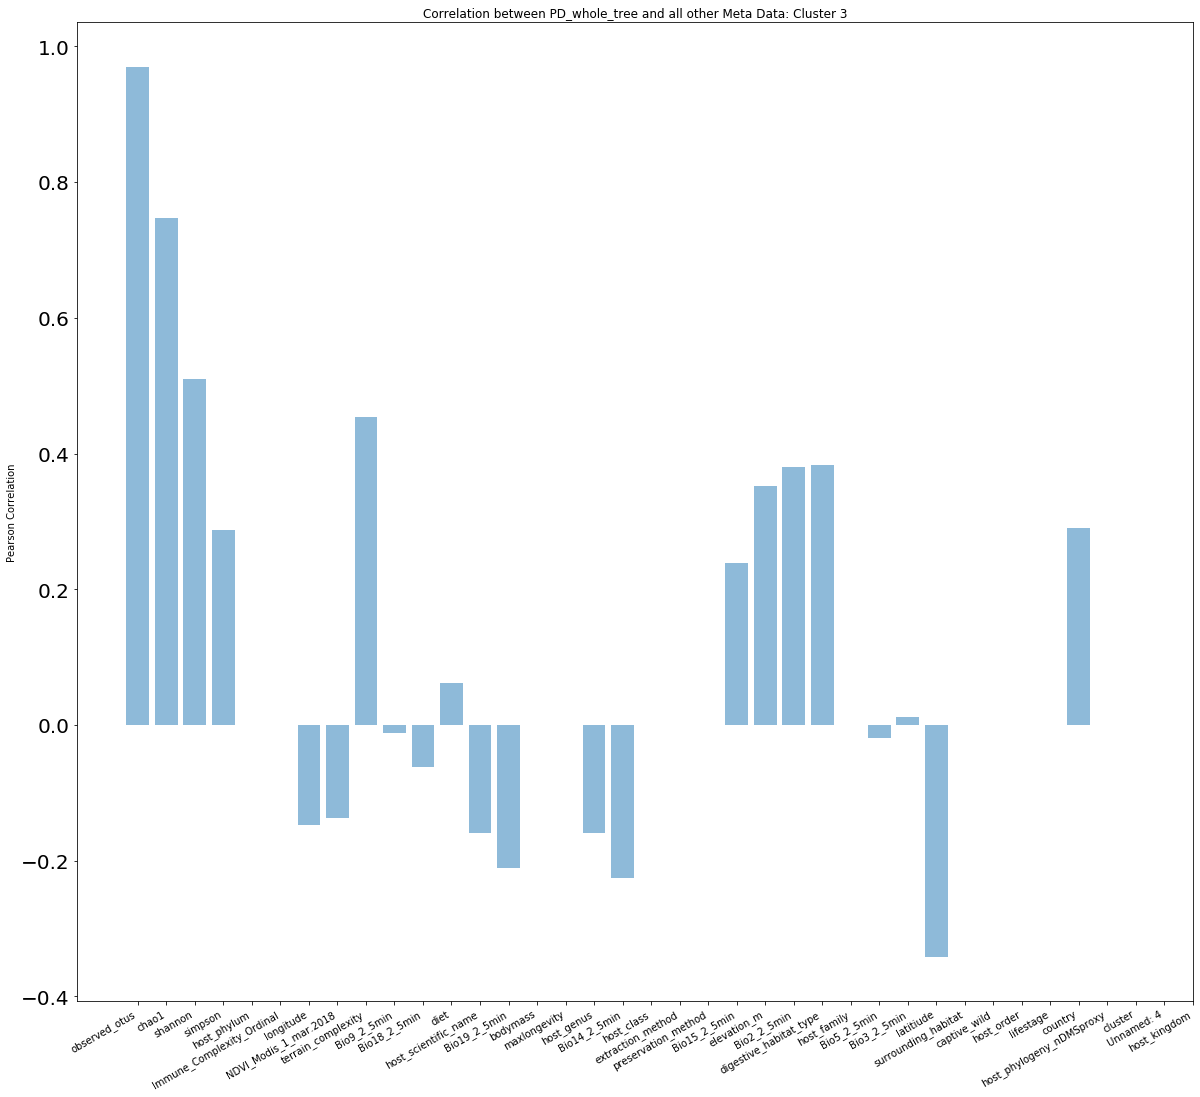

In [1364]:
fig11 = plt.figure(figsize=(20,20))
objects = ns_df_sorted2[ns_df_sorted2.columns[0]]
y_pos = np.arange(len(objects))
performance = ns_df_sorted2[ns_df_sorted2.columns[3]]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.tick_params(axis="x", labelsize=10)
plt.tick_params(axis="y", labelsize=20)
plt.ylabel('Pearson Correlation')
plt.title('Correlation between PD_whole_tree and all other Meta Data: Cluster 3')
fig11.autofmt_xdate()
plt.show()

fig11.savefig('Correlation_cluster_3.png')